In [4]:
%pylab inline
import glob
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
PLOTDIR = '/storage/BonnieH/selection_project/joint_method/figures/supp_validation/'

Populating the interactive namespace from numpy and matplotlib


In [5]:
# PLot validation of each optimal allele in a period together

def main():
    print('Running main')
    
    folder = 't31'
    fig_num = 0
    pers = [2,3,4] #,3,4
    #color_list = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','b','k']
    color_list = ['red','orange','gold','lawngreen','forestgreen','turquoise','blue','purple','brown','slategray']
    motif_dic = {}
    motif_dic[2] = ['AC','AG','AT']
    motif_dic[3] = ['ACC','AGG','AGC','CCG','AAG','AAC','ATC','AAT','ACT']
    motif_dic[4] = ['AAGG','AAAT','ATCC','AATC','AAAC','AATG','ACAT','AGAT','AAAG']
    
    opt_dic = {}
    opt_dic[2] = range(11,21,1)
    opt_dic[3] = range(5,14,1)
    opt_dic[4] = range(7,11,1)
    #clrs = sns.color_palette('husl', n_colors=10)
    color_dic_motif={}
    for per in pers:
        i = -1
    
        for motif in motif_dic[per]:
            i = i + 1
            color_dic_motif[motif] = color_list[i]
    
    color_dic_opt={}
    for per in pers:
        i = -1
        for opt in opt_dic[per]:
            i = i + 1
            color_dic_opt[(per, opt)] = color_list[i]
             
    dic_means = {}
    dic_legend = {}
    dic_diff_min = {}
    dic_diff_max = {}
    dic_num_loci = {}

    for per in pers:
        dic_means[per] = {}
        dic_legend[per] = {}
        dic_diff_min[per] = {}
        dic_diff_max[per] = {}
        dic_num_loci[per] = {}
        for motif in motif_dic[per]:
            dic_means[per][motif] = [-1] * len(opt_dic[per])
            dic_legend[per][motif] = opt_dic[per]
            dic_diff_min[per][motif] = [0] * len(opt_dic[per])
            dic_diff_max[per][motif] = [0] * len(opt_dic[per])
            dic_num_loci[per][motif] = [0] * len(opt_dic[per])
   
    spacing = 8
    # Plot motifs (sep graph for each opt allele)
    for per in pers:
        minimum = 100
        maximum = -100
        opt_alleles = opt_dic[per]
        print('Running period: %d'%(per))
        list_of_mean = []
        errors = []
        legend_labels = []
        for opt in opt_alleles:
            opt_string = str(opt)
            if opt < 10:
                opt_string = '0' + opt_string
            file_list = glob.glob('./results/results/%s/per_%d_*opt_%s.txt'%(folder, per, opt_string) )
            file_list.sort() 
            
            for filename in file_list:
               
                results_file = open(filename, 'r')
                lines = results_file.readlines()
                line = lines[9]
                info = line.strip().split(': ')
                num_acc = int(info[1])
                line = lines[1]
                info = line.strip().split(': ')
                num_loci = int(info[1])
                
                if num_acc > 0 and num_loci >= 10:
                    line = lines[12]
                    info = line.strip().split(': ')
                    mean_value = float(info[1])
                    line = lines[13]
                    info = line.strip().split(': ')
                    lower_mean_value = float(info[1])
                    line = lines[14]
                    info = line.strip().split(': ')
                    upper_mean_value = float(info[1])
                    line = lines[2]
                    info = line.strip().split(': ')
                    motif = info[2]
                    motif = motif.strip().split(' ')
                    motif = motif[0]
                    opt_allele = int(info[3])
                    if motif != '1.0' and motif != '0.0':
                        #list_of_mean.append(mean_value)
                        dic_means[per][motif][opt-opt_alleles[0]]= mean_value
                        dic_diff_min[per][motif][opt-opt_alleles[0]]= mean_value-lower_mean_value
                        dic_diff_max[per][motif][opt-opt_alleles[0]]= upper_mean_value-mean_value
                        dic_num_loci[per][motif][opt-opt_alleles[0]]= num_loci
                        print((mean_value, lower_mean_value, upper_mean_value))
                        max_val = max(mean_value,lower_mean_value,upper_mean_value)
                        min_val = min(mean_value,lower_mean_value,upper_mean_value)
                        #legend_labels.append((motif, opt_allele))
                        if min_val < minimum:
                            minimum = min_val
                        if max_val > maximum:
                            maximum = max_val
                
        # PLOT HISTOGRAM OF NUM LOCI
        #fig, (ax1, ax2) = plt.subplots(2, sharex=True)
        
        
        #fig_num = fig_num + 1
        #fig = plt.figure(fig_num)
        #fig.set_size_inches((12, 8))
        fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]},sharex=True,figsize=(15,10))
        
        #fig.suptitle('Period %d'%(per),size=15)
        ax1 = axs[0]
        ax2 = axs[1]
        #ax1 = fig.add_subplot(211)
        
        #fig_num = fig_num + 1
        #plt.figure(fig_num, figsize=(12, 2)) #
            
        offset = 0
        median_pos = int(len(dic_means[per])/2)
        i = 0
        for motif in dic_means[per]:
            
            list_of_num_loci = dic_num_loci[per][motif]
            y_pos = list(range(offset,(len(dic_means[per])+spacing)*len(opt_alleles) + offset,len(dic_means[per])+spacing))
            #plt.bar(y_pos, list_of_num_loci,color=color_dic_motif[motif],label=motif)  
            ax1.bar(y_pos, list_of_num_loci,color=color_dic_motif[motif],label=motif)  
            offset = offset + 1
            
        #plt.ylabel("Number of loci",size=15)
        #plt.yticks(size=15)
        #plt.xticks([])
        #plt.title('Period %d'%(per),size=15)
        
        ax1.set_ylabel("Number of loci",size=15)
        ax1.tick_params(labelsize=15)
        ax1.set_xticks([])
        ax1.set_title('Period %d'%(per),size=15)
        # Plot mean +/- ABC 95% CI
        #fig_num = fig_num + 1
        #plt.figure(fig_num, figsize=(12, 6)) #
        #ax2 = fig.add_subplot(212,sharex=ax1)
        offset = 0
        median_pos = int(len(dic_means[per])/2)
        
        for motif in dic_means[per]:
            
            list_of_mean = dic_means[per][motif]
            legend_labels = dic_legend[per][motif]
            diff_min = dic_diff_min[per][motif]
            diff_max = dic_diff_max[per][motif]
            y_pos = list(range(offset,(len(dic_means[per])+spacing)*len(opt_alleles) + offset,len(dic_means[per])+spacing))
            
            #plt.errorbar(y_pos, list_of_mean, marker = 'o', ls = 'none',yerr=[diff_min,diff_max],c=color_dic_motif[motif],label=motif)  #c=color_list[color_num],#,  label = 'Per %d Opt %d'%(per, opt)
            ax2.errorbar(y_pos, list_of_mean, marker = 'o', ls = 'none',yerr=[diff_min,diff_max],c=color_dic_motif[motif],label=motif)
            if offset == median_pos:
                y_pos_graph = y_pos
            
            offset = offset + 1
            
        #plt.yscale('log')
        #plt.xticks(y_pos_graph, legend_labels, rotation = 35, size=15) 
        #plt.ylabel("Mean of estimated s value distribution",size=15)
        #plt.xlabel("Optimal allele",size=15)
        #plt.yticks(size=15)
        #plt.legend()
        
        ax2.set_yscale('log')
        ax2.tick_params(labelsize=15)
        ax2.set_xticks(y_pos_graph) 
        ax2.set_xticklabels(legend_labels)
        ax2.set_ylabel("Mean of estimated s value distribution\n(with 95% CI of mean)",size=15)
        ax2.set_xlabel("Optimal allele",size=15)
        ax1.legend(bbox_to_anchor=(1, 1))

        #plt.axvline(x=2.5, linestyle = '--',c='black')
        #plt.axvline(x=5.5, linestyle = '--',c='black')
        #plt.axvline(x=8.5, linestyle = '--',c='black')
        #plt.text(0.2,10**-7.7,'Mean s=' + r'$10^{-5}$',size=15)
        #plt.text(3.2,10**-7.7,'Mean s=' + r'$10^{-4}$',size=15)
        #plt.text(6.2,10**-7.7,'Mean s=' + r'$10^{-3}$',size=15)
        #plt.text(9.2,10**-7.7,'Mean s=' + r'$10^{-2}$',size=15)
        #plt.text(4.7,10**-8,'Ground truth a,b',size=15)
        '''
        plt.text(0.7,10**-7.7,r'$s=10^{-5}$',size=15)
        plt.text(3.7,10**-7.7,r'$s=10^{-4}$',size=15)
        plt.text(6.7,10**-7.7,r'$s=10^{-3}$',size=15)
        plt.text(9.7,10**-7.7,r'$s=10^{-2}$',size=15)
        '''
        ax2.set_ylim(minimum - minimum/2, maximum + minimum/2)
        fig.tight_layout()
        #plt.legend()
        #plt.savefig(PLOTDIR + 'joint_validation.pdf',bbox_inches='tight')

Running main
Running period: 2
(0.0004133065510546331, 7.16392534587759e-05, 0.022613183956315706)
(4.082121349758653e-06, 4.9162005302896036e-08, 0.0006157524798781625)
(0.0007773727893767344, 0.000442631278958751, 0.002115991004151961)
(9.383912085193801e-06, 1.3495236191341475e-07, 7.93066144705561e-05)
(0.00019055412933175313, 4.6823412668191143e-07, 0.00036297559578347017)
(5.850006129947781e-05, 1.2979040917348688e-05, 0.00012986180480945025)
(0.0006284565555895172, 0.0001641335163999039, 0.006610824184988508)
(8.822160243756779e-05, 1.5762386297688105e-05, 0.00018454022851973278)
(1.363110464049929e-05, 6.970285585171514e-08, 0.0005527590434867529)
(6.299133015926575e-05, 2.5599208269074706e-05, 0.00020009241081444287)
(3.9254587072334635e-05, 1.7916252812392948e-07, 0.000604874147333886)
(7.551406883125994e-05, 2.196868726342753e-05, 0.0004284518946364872)
(0.0003463473287937858, 1.798924937558412e-06, 0.0006947461236699533)
(3.353701381298783e-05, 5.42212192625326e-06, 0.00027

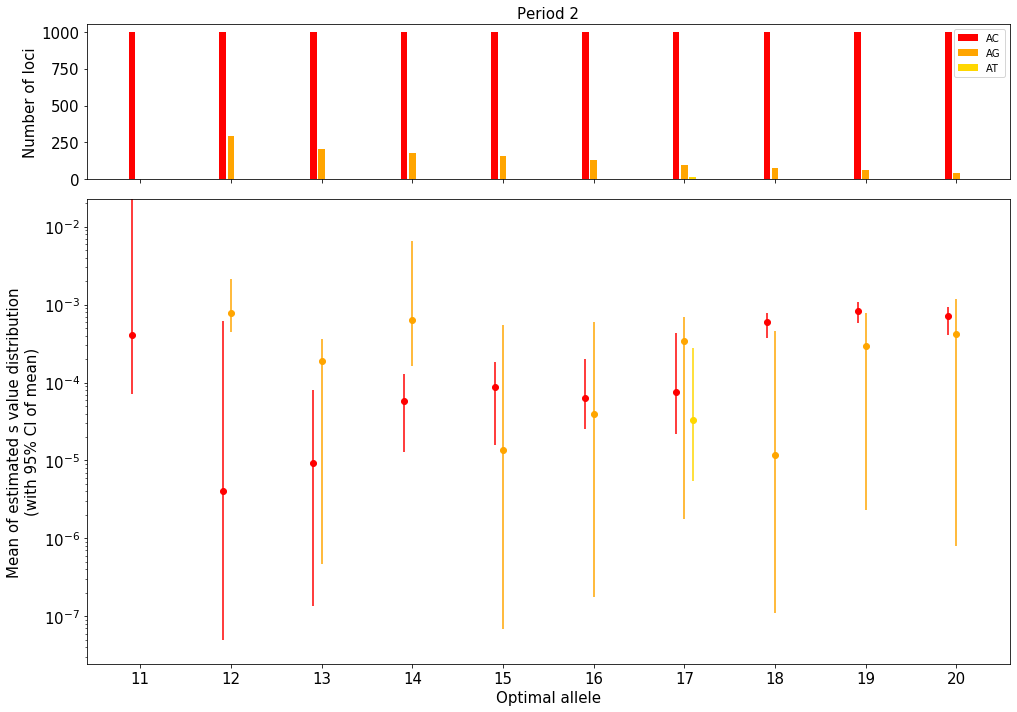

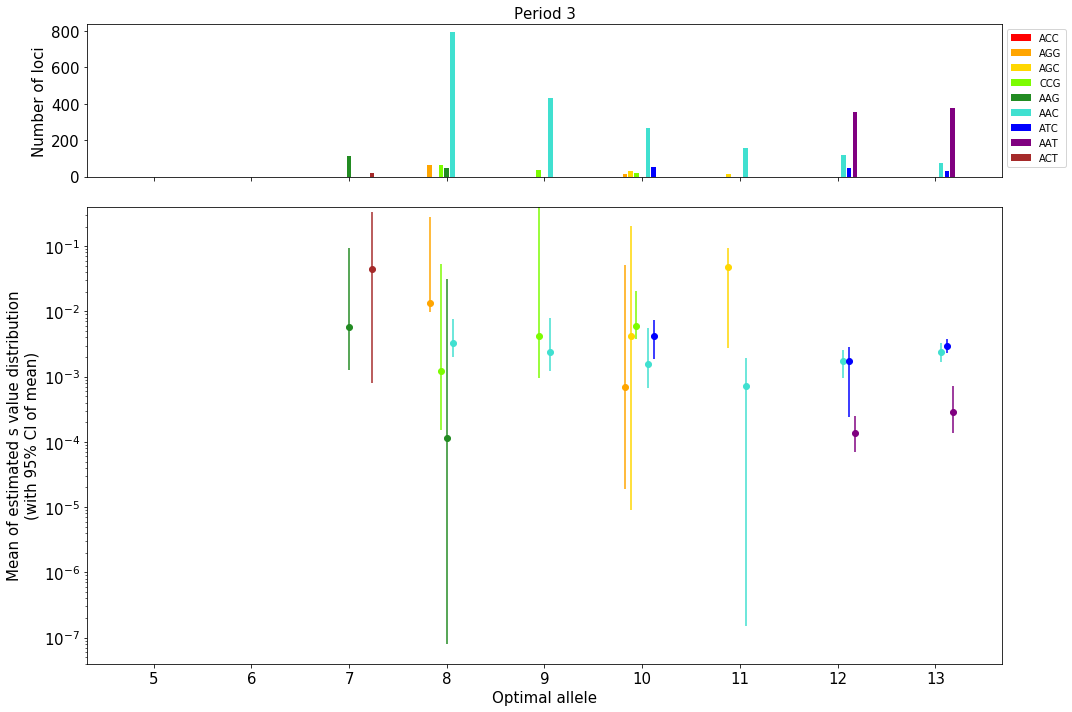

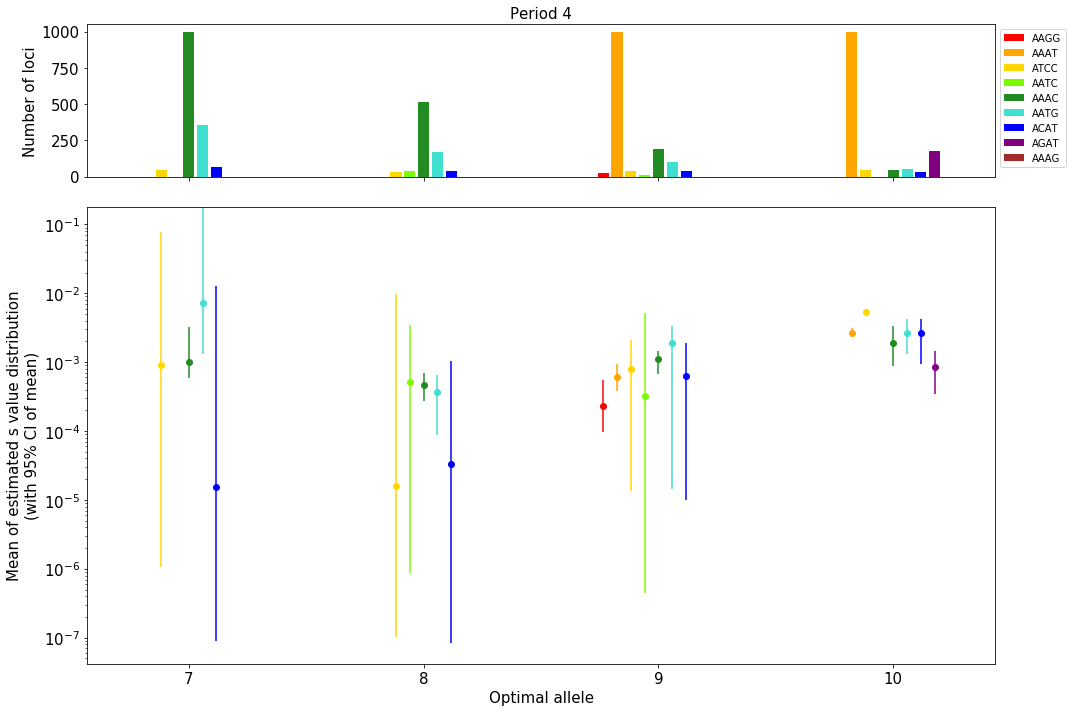

In [6]:
%%time
if __name__ == '__main__':
    main()